# 6. 머신러닝의 이해

# 6-4. 머신러닝 학습곡선 특징

# 학습곡선

### 학습곡선

- 최적의 모델은 훈련 데이터의 규모에도 의존함

- 데이터의 규모가 증가하면 검증 곡선의 그래프가 변경됨

- 학습곡선: 훈련집합의 크기에 따른 훈련 점수/검증 점수의 플롯

# 6-5. 그리드 서치 실습

# 그리드 서치

- 그리드 서치는 검증 점수를 최대화 하는 모델을 찾아내는 자동화 도구

### 최적의 다항식 모델을 구하기 위한 GridSearchCV

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

(-0.0542689833333313,
 0.9917994754295409,
 -0.7394900547650087,
 10.911541735432142)

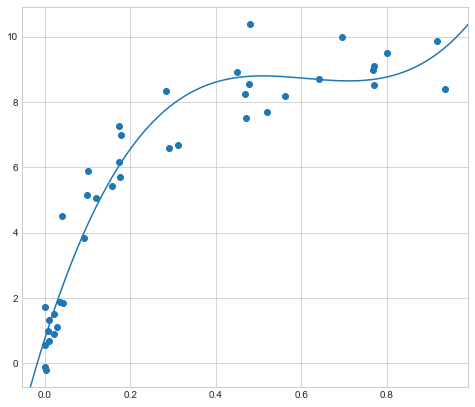

In [78]:
np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40)

plt.style.use("seaborn-whitegrid")

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

fig = plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polynomialfeatures__degree': np.arange(21),
    'linearregression__fit_intercept': [True, False],
    'linearregression__normalize': [True, False]
}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7) 

- param_grid

    - degree 0 ~ 20 값을 하나씩 대응

    - True, False를 대응

    - 80가지(10*2*2) 경우의 파라미터 그리드를 만들어 넘기면
    
    - 자동으로 그리드 서치 진행

- cv=7
    - 7겹의 교차 검증 실행

In [80]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearre

In [81]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.0542689833333313,
 0.9917994754295409,
 -0.7394900547650087,
 10.911541735432142)

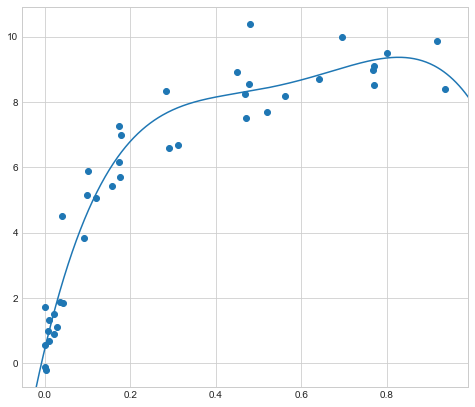

In [82]:
# 최종 모델
model = grid.best_estimator_

plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

- 시각화된 최적 모델

# 실습

In [83]:
# 사용할 라이브러리 로딩
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# 랜덤값을 이용해 특징행렬 데이터 만들기
np.random.seed(1)

X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40)

In [85]:
X.shape, y.shape

((40, 1), (40,))

In [86]:
from sklearn.model_selection import validation_curve

In [87]:
# degree 만들기
degree = np.arange(0, 21)

In [88]:
train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()), 
                                        X, y, "polynomialfeatures__degree", degree, cv=5)

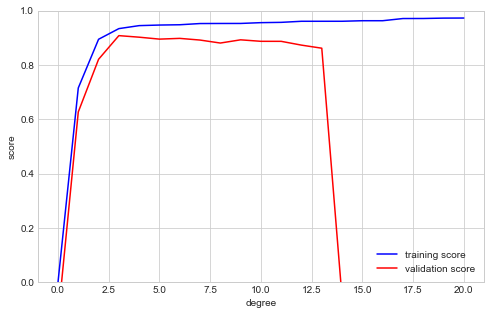

In [89]:
# plt 플롯을 이용해 라인 플롯 만들기(시각화)
plt.figure(figsize=(8, 5))
plt.plot(degree, np.median(train_score, axis=1), "b-", label="training score")
plt.plot(degree, np.median(val_score, axis=1), "r-", label="validation score")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")
plt.legend(loc="best")

In [90]:
# 테스트 데이터 만들기
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

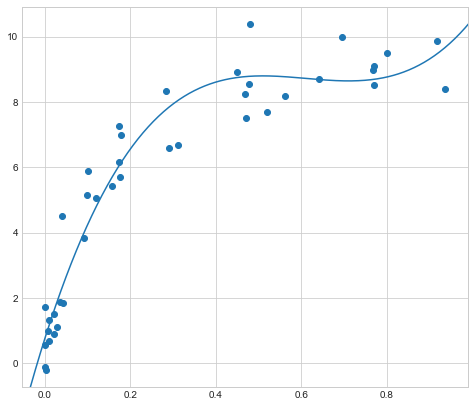

In [91]:
plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = make_pipeline(PolynomialFeatures(degree=3), LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);

- limit 정보 구성 -> 파이프라인 구성 -> 최종 모델과 데이터 적합 -> 검정

- ; 를 이용하면 바로 출력 가능

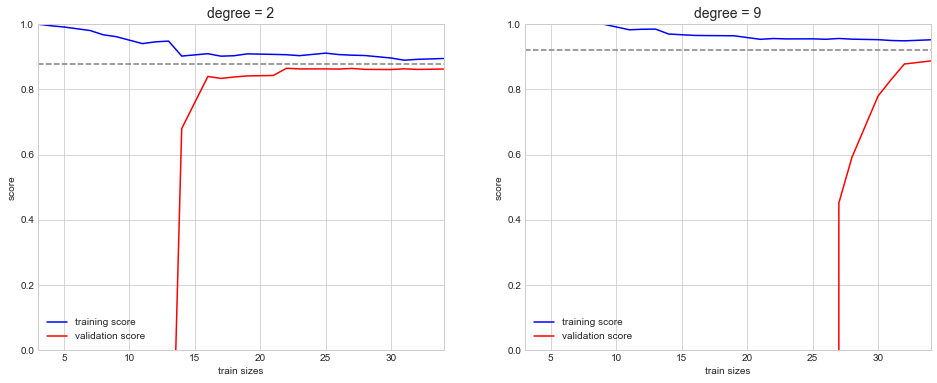

In [100]:
# 학습 곡선(learning curve) 만들기
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for i, degree in enumerate([2, 9]):
    n, train_lc, val_lc = learning_curve(make_pipeline(PolynomialFeatures(degree=degree), LinearRegression()),
                                        X, y, cv=7, train_sizes=np.linspace(0.1, 1, 25))
    # 학습 곡선 플롯 그리기
    ax[i].plot(n, np.mean(train_lc, 1), "b-", label="training score")
    ax[i].plot(n, np.mean(val_lc, 1), "r-", label="validation score")
    # 수렴 지점에 점선 그리기
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), n[0], n[-1], color="gray", linestyle="dashed")
    # limit 지정
    ax[i].set(xlim=(n[0], n[-1]), ylim=(0, 1), xlabel="train sizes", ylabel="score")
    ax[i].set_title("degree = {}".format(degree), size=14)
    ax[i].legend(loc="best")


### 그리드 서치

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
params = {
    "polynomialfeatures__degree": np.arange(21),
    "linearregression__fit_intercept": [True, False],
    "linearregression__normalize": [True, False]
}

In [95]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(), LinearRegression()),
                    params, cv=7)

In [96]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearre

- 만약 iid관련 DeprecationWarning이 뜬다면 iid=True 옵션을 넣어주면 됨

In [97]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [98]:
model = grid.best_estimator_
model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

(-0.0542689833333313,
 0.9917994754295409,
 -0.7394900547650087,
 10.911541735432142)

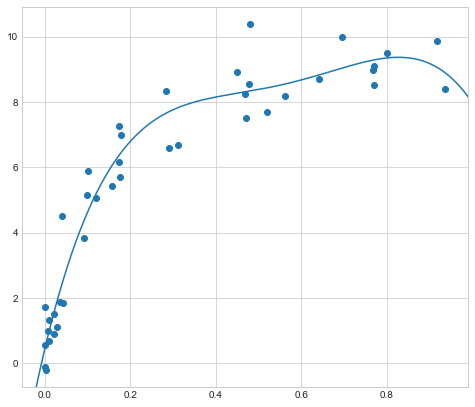

In [99]:
# 그리드 서치 시각화(라인 플롯)
plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim)

- 위 라인 플롯이 그리드 서치를 통해 나온 최적 모델을 사용한 결과다.

<br/>

> 추가 공부가 필요함

<br/>

### Reference

https://www.youtube.com/watch?v=4FGDcIMcUZo